### 2. 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [2]:
# 네이버 영화 리뷰 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="../../data/ratings.txt")

('../../data/ratings.txt', <http.client.HTTPMessage at 0x406d4eff50>)

In [3]:
trainData = pd.read_table('../../data/ratings.txt')
trainData.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [4]:
print(len(trainData))

200000


In [5]:
# NULL 값 존재 유무
print(trainData.isnull().values.any())

True


In [6]:
# 결측치 제거
trainData = trainData.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(trainData.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [7]:
print(len(trainData))

199992


In [8]:
# 정규 표현식을 통해 한글 외 문자 제거
trainData['document'] = trainData['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/home/student/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [9]:
trainData.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [11]:
# 불용어 정의
from tqdm import tqdm
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenizedData = []
for sentence in tqdm(trainData['document']):
    tokenizedSentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwordsRemovedSentence = [word for word in tokenizedSentence if not word in stopwords] # 불용어 제거
    tokenizedData.append(stopwordsRemovedSentence)

100%|████████████████████████████████████████████████████████████████████████████| 199992/199992 [37:08<00:00, 89.75it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


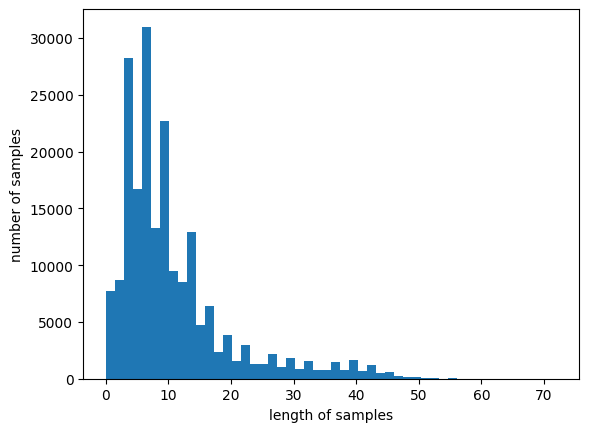

In [12]:
# 토큰화된 상태에서의 통계치 확인

# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenizedData))
print('리뷰의 평균 길이 :',sum(map(len, tokenizedData))/len(tokenizedData))
plt.hist([len(review) for review in tokenizedData], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [13]:
# 그래프 셋팅
def showGraph(bargraph):
    xtick = [item[0] for item in bargraph] # words
    ytick = [item[1] for item in bargraph] # 유사도
    plt.figure()
    mycolors = ['#06c2ac', '#c79fef', '#ff796c', '#aaff32', '#0485d1', '#d648d7', '#a5a502', '#d8dcd6', '#5ca904', '#fffe7a' ]
    plt.bar(xtick, ytick, color=mycolors)

##### 네이버 영화 리뷰 데이터 학습(Word2Vec)

In [14]:
from gensim.models import Word2Vec

In [26]:
# 모델 생성하기
#model = Word2Vec(sentences = tokenizedData, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

# 기저장된 모델 불러오기
model = Word2Vec.load('../../resource/kor_word2vec.model')

In [27]:
# 완성된 임베딩 매트릭스의 크기
model.wv.vectors.shape

(16477, 100)

### 한글 폰트 설치 및 불러오기
-----------------------
- 적당한 ttf 글꼴 다운로드(예> D2Coding-Ver1.3.2-20180524-ligature.ttf)
- matplotlib 환경설정 폴더로 이동
    - print(mpl.matplotlib_fname()) :: 환경설정 폴더 -> fonts/ttf/
- matplotlib 캐시 재설정
    - print(mpl.get_cachedir()) -> fontlist-v310 파일에서 위 설치한 폴더의 폰트 이름(font_name)을 찾아서 설정
    - plt.rcParams['font.family'] = 'D2Coding ligature'

In [28]:
# 그래프 한글 폰트 처리
import matplotlib as mpl

plt.rcParams['font.family'] = 'D2Coding ligature'

In [29]:
model_result = model.wv.most_similar('최민식', topn=7)
print(model_result)

[('안성기', 0.8483557105064392), ('채민서', 0.8375873565673828), ('한석규', 0.8320987224578857), ('단역', 0.8246117830276489), ('크리스찬', 0.8218923211097717), ('서영희', 0.8103397488594055), ('임원희', 0.8084965348243713)]


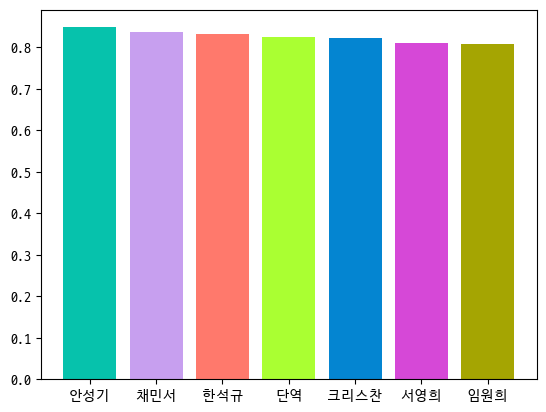

In [30]:
showGraph(model_result)
plt.show()

In [31]:
model_result = model.wv.most_similar('히어로', topn=7)
print(model_result)

[('슬래셔', 0.8502619862556458), ('느와르', 0.8486109375953674), ('무협', 0.8475209474563599), ('호러', 0.8318272829055786), ('정통', 0.8290469646453857), ('물', 0.8239656686782837), ('블록버스터', 0.8163356781005859)]


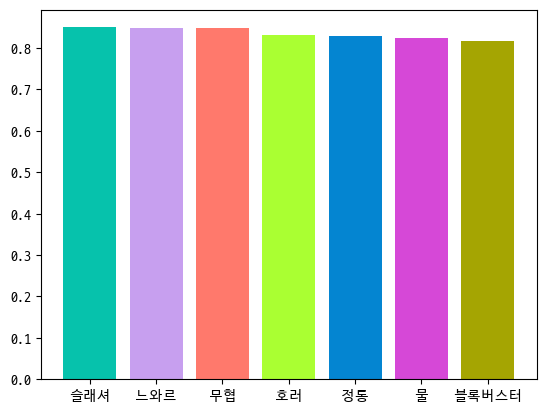

In [32]:
showGraph(model_result)
plt.show()

In [33]:
model_result = model.wv.most_similar(positive=['극장', '웃음'], negative=['학원'], topn=10)
print(model_result)

[('웃다', 0.5383194088935852), ('눈물', 0.4926489591598511), ('욕', 0.4665120244026184), ('감동', 0.4533455967903137), ('영화관', 0.44220665097236633), ('교훈', 0.4289604127407074), ('미소', 0.39130187034606934), ('여운', 0.38710829615592957), ('재미', 0.385328471660614), ('슬프다', 0.37630900740623474)]


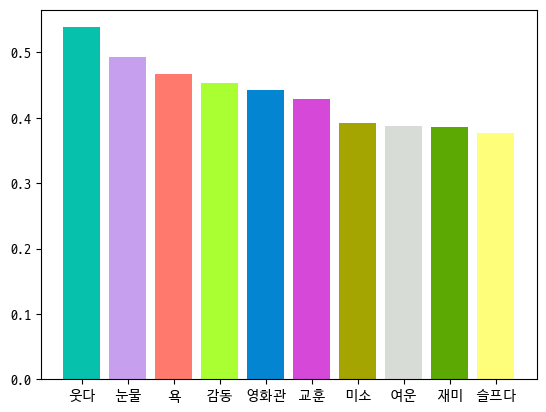

In [34]:
showGraph(model_result)
plt.show()

In [36]:
model_result = model.wv.most_similar(positive=['코믹','호러'], negative=['웃음'], topn=10)
print(model_result)

[('무협', 0.7837238311767578), ('틴', 0.7723041772842407), ('느와르', 0.7640644907951355), ('로코', 0.7634316682815552), ('슬래셔', 0.7617172002792358), ('정통', 0.7596845626831055), ('히어로', 0.756429135799408), ('하이', 0.751818835735321), ('블록버스터', 0.7461071014404297), ('멜로', 0.7390706539154053)]


In [35]:
model.save('../../resource/kor_word2vec.model')